# Objectives:
1. To do convoultion between to signal manually without builit in convolution function.
2. To verify commutative property of the convolution.
3. To prove Associative and Distributive properties of the convolution.


We have the impulse response of a system as h( n) = {3, 2,**1**, −2,1, 0, −4, 0, 3}.
 For x (n) = {**1**, −2,3, −4,3, 2,1} , Find y(n).

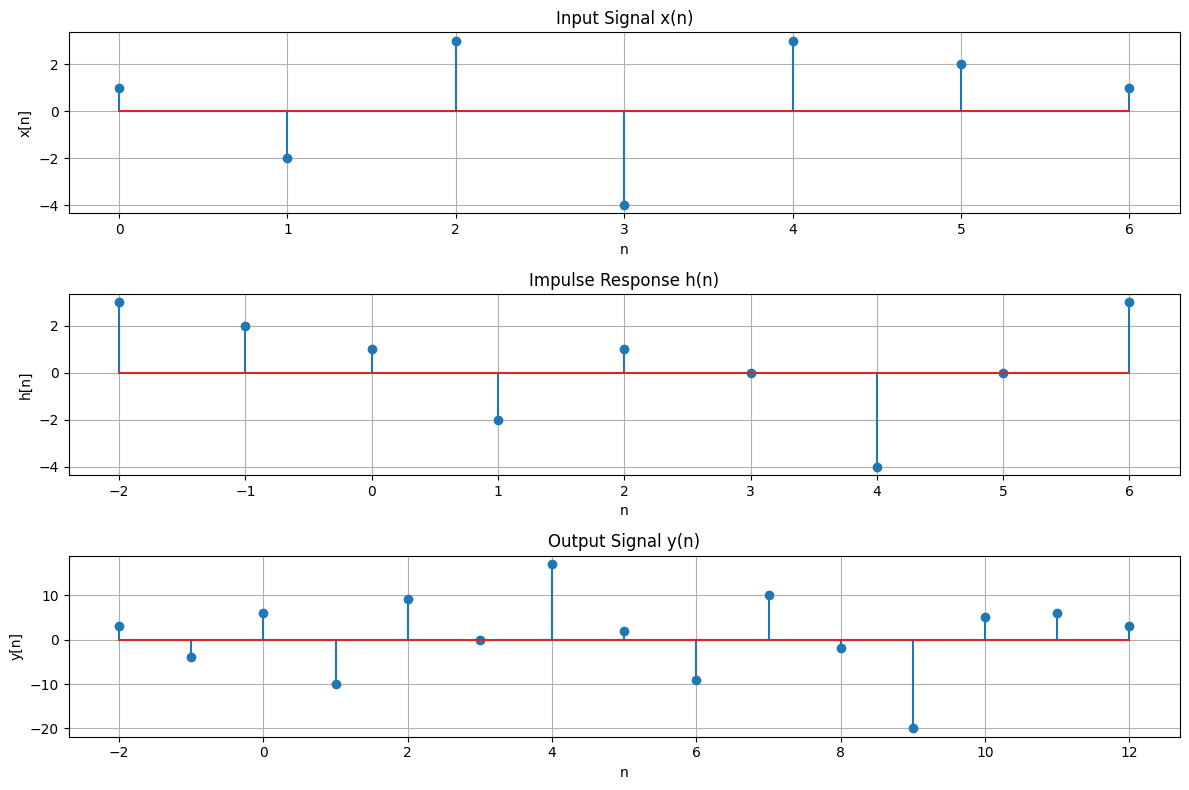

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def manual_convolution_with_origin(x, h, x_origin, h_origin):
    N = len(x) + len(h) - 1
    y = np.zeros(N)
    y_origin = x_origin + h_origin
    for n in range(N):
        for k in range(len(x)):
            if 0 <= n - k < len(h):  # Simplified condition
                y[n] += x[k] * h[n - k]
    return y, y_origin

# Input signals
x = [1, -2, 3, -4, 3, 2, 1]
h = [3, 2, 1, -2, 1, 0, -4, 0, 3]
x_origin = 0
h_origin = 2

# Perform manual convolution
y, y_origin = manual_convolution_with_origin(x, h, x_origin, h_origin)

# Time indices for plotting
n_x = np.arange(-x_origin, len(x) - x_origin)
n_h = np.arange(-h_origin, len(h) - h_origin)
n_y = np.arange(-y_origin, len(y) - y_origin)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n_x, x)
plt.title("Input Signal x(n)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n_h, h)
plt.title("Impulse Response h(n)")
plt.xlabel("n")  # Added missing xlabel for the second subplot
plt.ylabel("h[n]")
plt.grid(True)

plt.subplot(3, 1, 3)  # Added plotting for the output signal
plt.stem(n_y, y)
plt.title("Output Signal y(n)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

##For input x(n)={0,0,1,0,0}

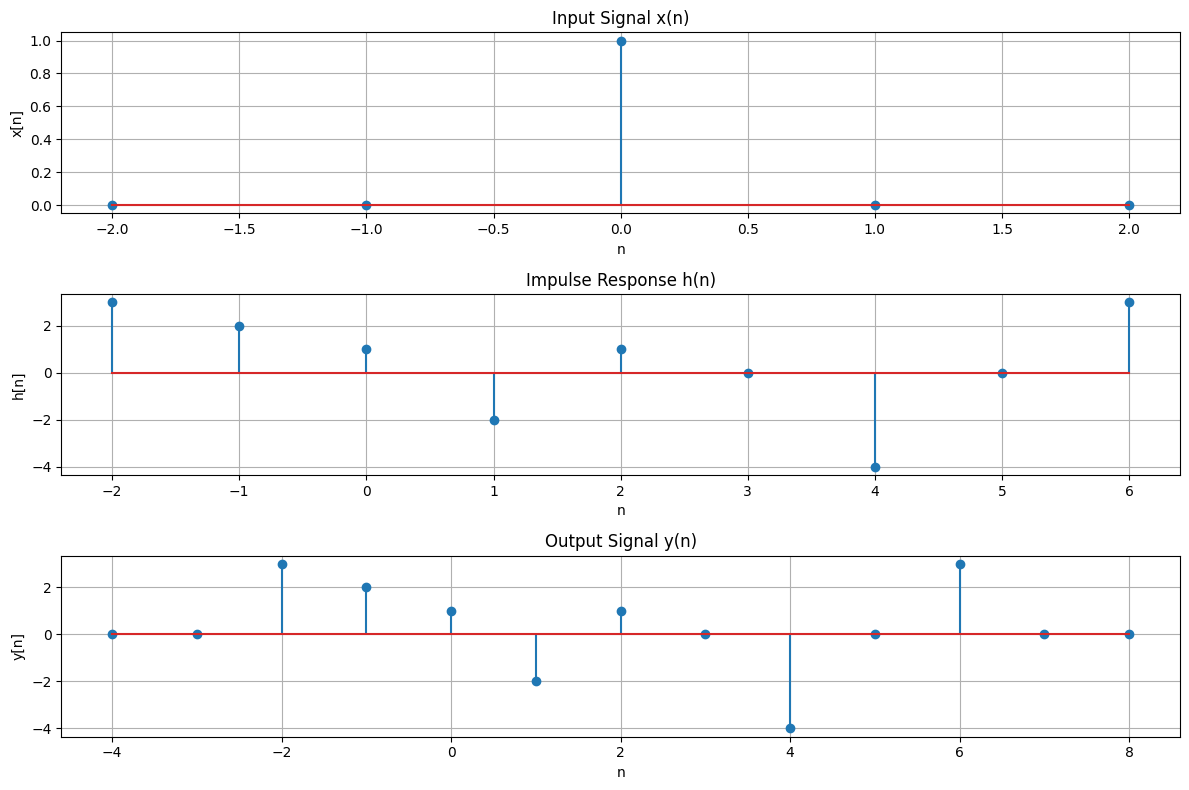

In [8]:


# Input signals
x = [0,0,1,0,0]
h = [3, 2, 1, -2, 1, 0, -4, 0, 3]
x_origin = 2
h_origin = 2

# Perform manual convolution
y, y_origin = manual_convolution_with_origin(x, h, x_origin, h_origin)

# Time indices for plotting
n_x = np.arange(-x_origin, len(x) - x_origin)
n_h = np.arange(-h_origin, len(h) - h_origin)
n_y = np.arange(-y_origin, len(y) - y_origin)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n_x, x)
plt.title("Input Signal x(n)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n_h, h)
plt.title("Impulse Response h(n)")
plt.xlabel("n")  # Added missing xlabel for the second subplot
plt.ylabel("h[n]")
plt.grid(True)

plt.subplot(3, 1, 3)  # Added plotting for the output signal
plt.stem(n_y, y)
plt.title("Output Signal y(n)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

## Prove commutative property of the convolution

Convolution x*h: [ 0.  0.  3.  2.  1. -2.  1.  0. -4.  0.  3.  0.  0.]
Convolution h*x: [ 0.  0.  3.  2.  1. -2.  1.  0. -4.  0.  3.  0.  0.]
Are the results equal? True


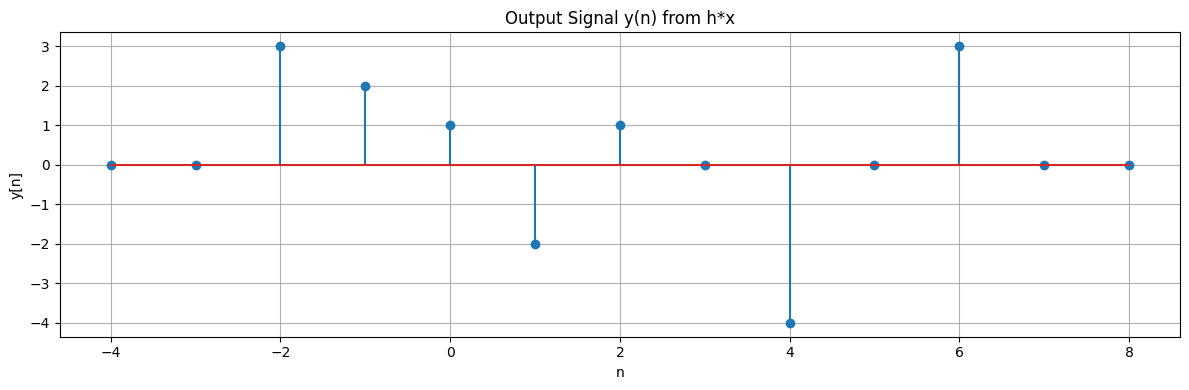

In [11]:

# Perform convolution of h*x
y_hx, y_hx_origin = manual_convolution_with_origin(h, x, h_origin, x_origin)

# Check if the results are approximately equal
are_equal = np.allclose(y, y_hx)

print(f"Convolution x*h: {y}")
print(f"Convolution h*x: {y_hx}")
print(f"Are the results equal? {are_equal}")

# Plotting h*x
plt.figure(figsize=(12, 4))

plt.stem(np.arange(-y_hx_origin, len(y_hx) - y_hx_origin), y_hx)
plt.title("Output Signal y(n) from h*x")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.tight_layout()
plt.show()


## prove Associative and Distributive properties of the convolution


--- Proof of Associative Property ---
(x * h1): [ 0.  0.  3.  2.  1. -2.  1.  0. -4.  0.  3.  0.  0.]
(x * h1) * h2: [ 0.  0.  3.  5.  3. -1. -1.  1. -4. -4.  3.  3.  0.  0.]
Origin of (x * h1) * h2: 4
(h1 * h2): [ 3.  5.  3. -1. -1.  1. -4. -4.  3.  3.]
x * (h1 * h2): [ 0.  0.  3.  5.  3. -1. -1.  1. -4. -4.  3.  3.  0.  0.]
Origin of x * (h1 * h2): 4
Are the results of associative property equal? True


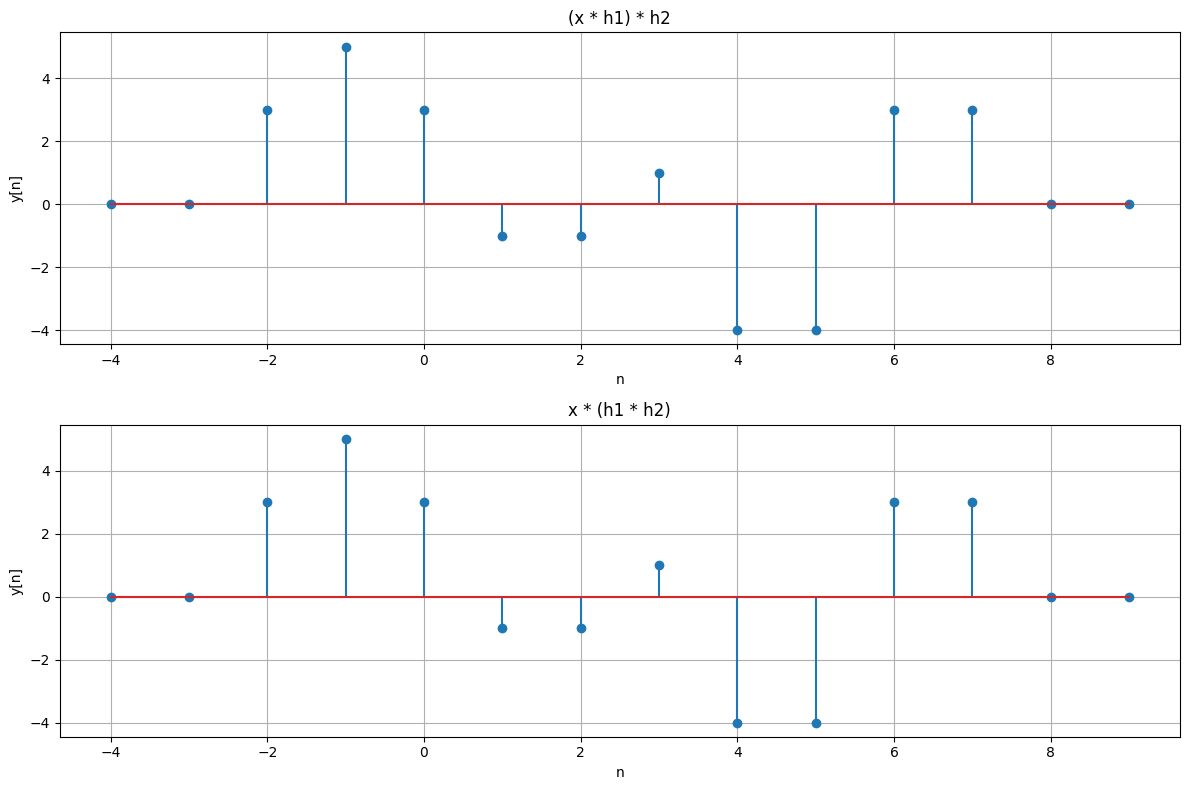


--- Proof of Distributive Property ---
(h1 + h2): [ 3.  2.  2. -1.  1.  0. -4.  0.  3.]
Origin of (h1 + h2): 2
x * (h1 + h2): [ 0.  0.  3.  2.  2. -1.  1.  0. -4.  0.  3.  0.  0.]
Origin of x * (h1 + h2): 4
(x * h1): [ 0.  0.  3.  2.  1. -2.  1.  0. -4.  0.  3.  0.  0.]
(x * h2): [0. 0. 1. 1. 0. 0.]
(x * h1) + (x * h2): [ 0.  0.  3.  2.  2. -1.  1.  0. -4.  0.  3.  0.  0.]
Origin of (x * h1) + (x * h2): 4
Are the results of distributive property equal? True


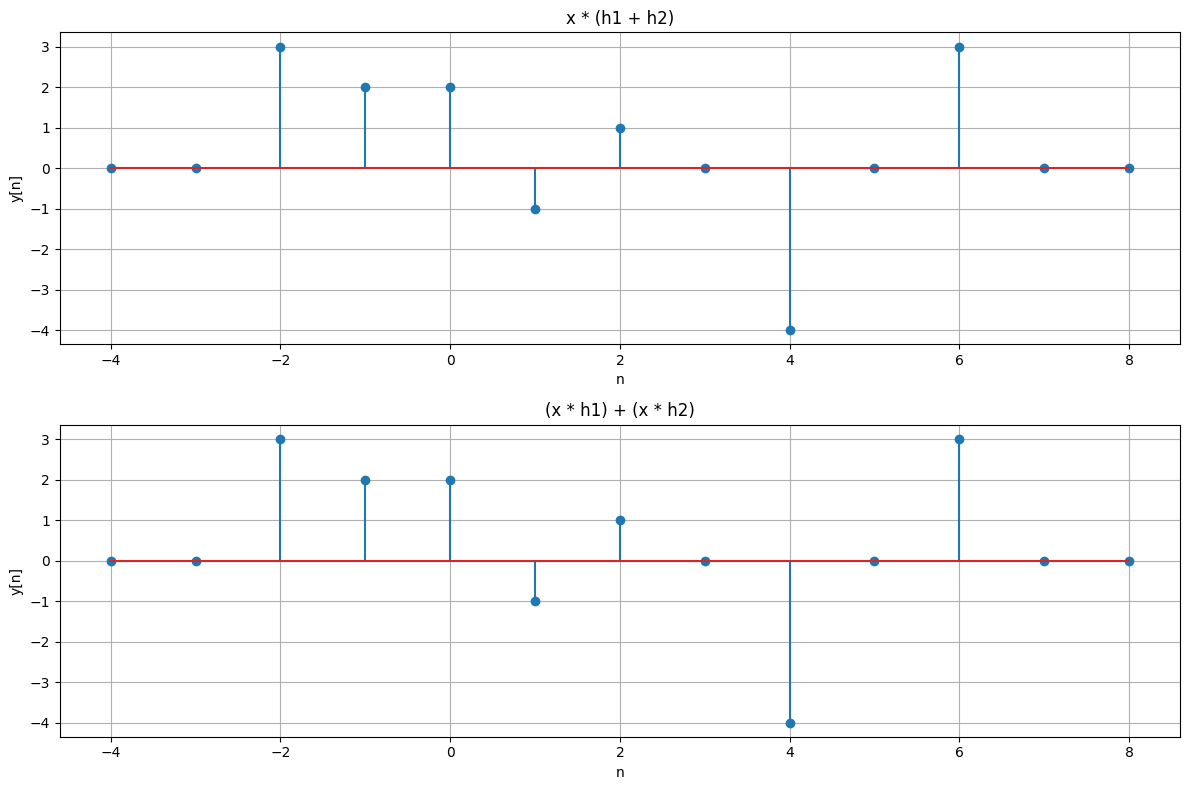

In [12]:
# Proof of Associative Property: (x * h1) * h2 = x * (h1 * h2)
print("\n--- Proof of Associative Property ---")

# Define a third signal h2
h2 = [1, 1]
h2_origin = 0

# Case 1: (x * h1) * h2
# First, compute y1 = x * h1
y1, y1_origin = manual_convolution_with_origin(x, h, x_origin, h_origin)
print(f"(x * h1): {y1}")

# Second, compute y_assoc1 = y1 * h2
y_assoc1, y_assoc1_origin = manual_convolution_with_origin(y1, h2, y1_origin, h2_origin)
print(f"(x * h1) * h2: {y_assoc1}")
print(f"Origin of (x * h1) * h2: {y_assoc1_origin}")

# Case 2: x * (h1 * h2)
# First, compute h12 = h1 * h2
h12, h12_origin = manual_convolution_with_origin(h, h2, h_origin, h2_origin)
print(f"(h1 * h2): {h12}")

# Second, compute y_assoc2 = x * h12
y_assoc2, y_assoc2_origin = manual_convolution_with_origin(x, h12, x_origin, h12_origin)
print(f"x * (h1 * h2): {y_assoc2}")
print(f"Origin of x * (h1 * h2): {y_assoc2_origin}")


# Check if y_assoc1 and y_assoc2 are approximately equal
are_associative_equal = np.allclose(y_assoc1, y_assoc2)
print(f"Are the results of associative property equal? {are_associative_equal}")

# Plotting to visually confirm
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(np.arange(-y_assoc1_origin, len(y_assoc1) - y_assoc1_origin), y_assoc1)
plt.title("(x * h1) * h2")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(np.arange(-y_assoc2_origin, len(y_assoc2) - y_assoc2_origin), y_assoc2)
plt.title("x * (h1 * h2)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.tight_layout()
plt.show()


# Proof of Distributive Property: x * (h1 + h2) = (x * h1) + (x * h2)
print("\n--- Proof of Distributive Property ---")

# Define h1 and h2 for distributive property
# Use the h from the original code as h1 and the defined h2 as h2
h1 = h
h1_origin = h_origin
h2 = [1, 1] # Using the previously defined h2
h2_origin = 0

# To add signals, they must be of the same length and have the same origin.
# Pad the shorter signal with zeros to match the length and adjust for origin.

# Determine the minimum and maximum indices for both h1 and h2
h1_start_idx = -h1_origin
h1_end_idx = len(h1) - 1 - h1_origin
h2_start_idx = -h2_origin
h2_end_idx = len(h2) - 1 - h2_origin

min_idx = min(h1_start_idx, h2_start_idx)
max_idx = max(h1_end_idx, h2_end_idx)

# Calculate the new length and the new origin for the summed signal
new_len_h1_plus_h2 = max_idx - min_idx + 1
new_origin_h1_plus_h2 = -min_idx

# Pad h1
padded_h1 = np.zeros(new_len_h1_plus_h2)
h1_insert_start = h1_start_idx - min_idx
h1_insert_end = h1_insert_start + len(h1)
padded_h1[h1_insert_start:h1_insert_end] = h1

# Pad h2
padded_h2 = np.zeros(new_len_h1_plus_h2)
h2_insert_start = h2_start_idx - min_idx
h2_insert_end = h2_insert_start + len(h2)
padded_h2[h2_insert_start:h2_insert_end] = h2

# Compute h1 + h2
h1_plus_h2 = padded_h1 + padded_h2
print(f"(h1 + h2): {h1_plus_h2}")
print(f"Origin of (h1 + h2): {new_origin_h1_plus_h2}")


# Case 1: x * (h1 + h2)
y_dist1, y_dist1_origin = manual_convolution_with_origin(x, h1_plus_h2, x_origin, new_origin_h1_plus_h2)
print(f"x * (h1 + h2): {y_dist1}")
print(f"Origin of x * (h1 + h2): {y_dist1_origin}")

# Case 2: (x * h1) + (x * h2)
# We already computed y = x * h in the original code, which is x * h1
y_x_h1 = y # Use the result from the original code
y_x_h1_origin = y_origin

# Compute x * h2
y_x_h2, y_x_h2_origin = manual_convolution_with_origin(x, h2, x_origin, h2_origin)
print(f"(x * h1): {y_x_h1}")
print(f"(x * h2): {y_x_h2}")

# Add y_x_h1 and y_x_h2. Again, pad to match length and origin.
y_x_h1_start_idx = -y_x_h1_origin
y_x_h1_end_idx = len(y_x_h1) - 1 - y_x_h1_origin
y_x_h2_start_idx = -y_x_h2_origin
y_x_h2_end_idx = len(y_x_h2) - 1 - y_x_h2_origin

dist_min_idx = min(y_x_h1_start_idx, y_x_h2_start_idx)
dist_max_idx = max(y_x_h1_end_idx, y_x_h2_end_idx)

new_len_y_sum = dist_max_idx - dist_min_idx + 1
new_origin_y_sum = -dist_min_idx

# Pad y_x_h1
padded_y_x_h1 = np.zeros(new_len_y_sum)
y_x_h1_insert_start = y_x_h1_start_idx - dist_min_idx
y_x_h1_insert_end = y_x_h1_insert_start + len(y_x_h1)
padded_y_x_h1[y_x_h1_insert_start:y_x_h1_insert_end] = y_x_h1

# Pad y_x_h2
padded_y_x_h2 = np.zeros(new_len_y_sum)
y_x_h2_insert_start = y_x_h2_start_idx - dist_min_idx
y_x_h2_insert_end = y_x_h2_insert_start + len(y_x_h2)
padded_y_x_h2[y_x_h2_insert_start:y_x_h2_insert_end] = y_x_h2

# Compute (x * h1) + (x * h2)
y_dist2 = padded_y_x_h1 + padded_y_x_h2
y_dist2_origin = new_origin_y_sum

print(f"(x * h1) + (x * h2): {y_dist2}")
print(f"Origin of (x * h1) + (x * h2): {y_dist2_origin}")


# Check if y_dist1 and y_dist2 are approximately equal
are_distributive_equal = np.allclose(y_dist1, y_dist2)
print(f"Are the results of distributive property equal? {are_distributive_equal}")

# Plotting to visually confirm
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(np.arange(-y_dist1_origin, len(y_dist1) - y_dist1_origin), y_dist1)
plt.title("x * (h1 + h2)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(np.arange(-y_dist2_origin, len(y_dist2) - y_dist2_origin), y_dist2)
plt.title("(x * h1) + (x * h2)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.tight_layout()
plt.show()
